In [12]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from IPython.display import display
import warnings
%matplotlib inline

In [98]:
Path = '../../data/firstRound_4h.csv'
df = pd.read_csv(Path)

In [99]:
Path2 = '../../data/First_round_results/CSVs/FirstRep1.csv'
df2 = pd.read_csv(Path2)
df2.set_index('Time',inplace=True)

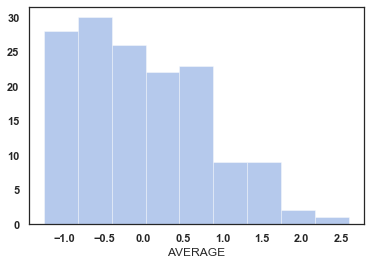

In [100]:
sns.set(style="white", palette="muted", color_codes=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df['AVERAGE'], kde=False, color="b")

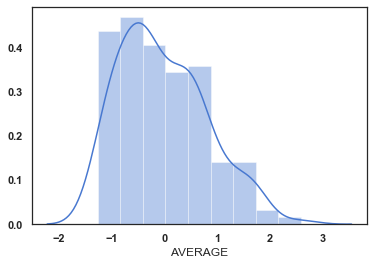

In [101]:
sns.distplot(df['AVERAGE'], kde=True, color="b")

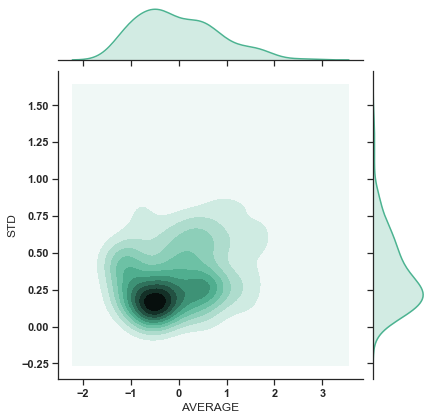

In [102]:
sns.set(style="ticks")

sns.jointplot(df['AVERAGE'], df['STD'],  kind="kde", color="#4CB391");

C:\Users\HOL428\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


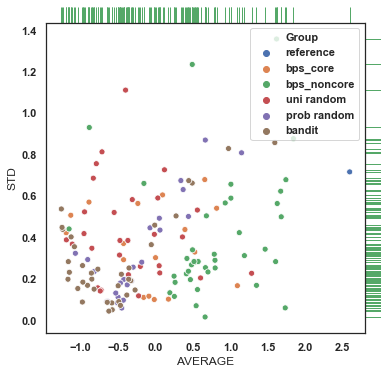

In [103]:
sns.set(style="white", color_codes=True)

grid = sns.JointGrid(df['AVERAGE'], df['STD'],  space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g",hue=df['Group'])
grid.plot_marginals(sns.rugplot, height=1, color="g")

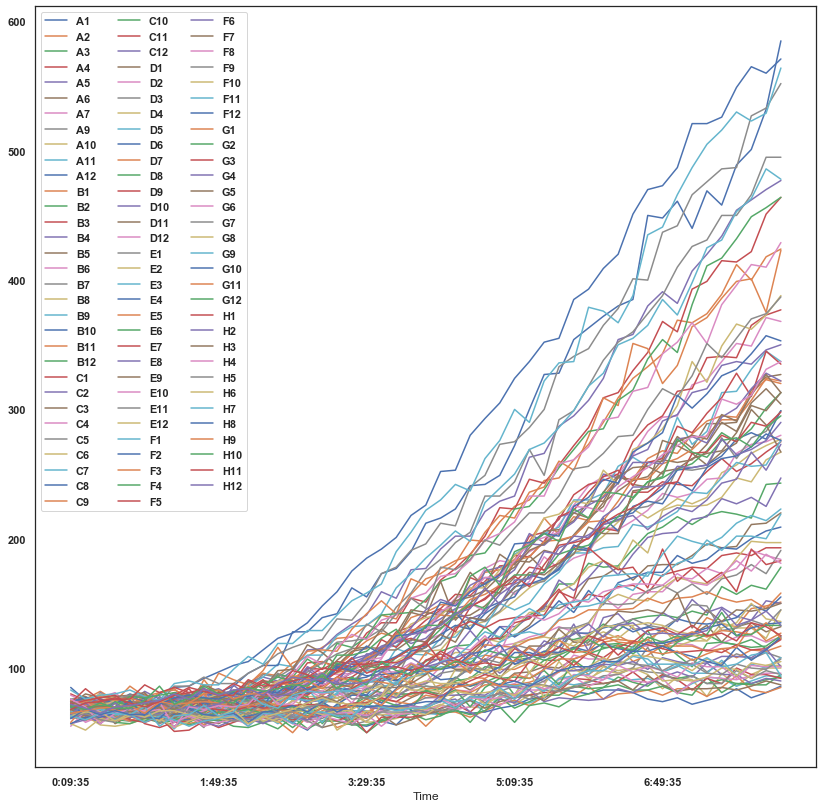

In [104]:
fig, ax = plt.subplots( figsize=(14,14))
df2.plot(ax = ax);
ax.legend(loc='upper left',ncol=3)

In [21]:
Path3 = '../../data/Pos_Change.csv'
df3 = pd.read_csv(Path3)
#df3.drop([df3['AVERAGE'] == 2.592357],axis=1)
#df3.iloc[1:].loc[df3['Base'] == "T"]

C:\Users\HOL428\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


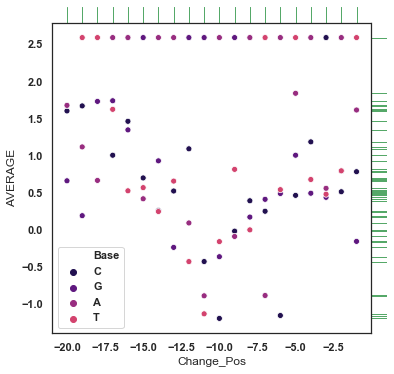

In [106]:
sns.set(style="white", color_codes=True,palette='magma')
grid = sns.JointGrid(df3['Change_Pos'].iloc[1:], df3['AVERAGE'].iloc[1:],  space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g",hue=df3['Base'].iloc[1:])
grid.plot_marginals(sns.rugplot, height=1, color="g")

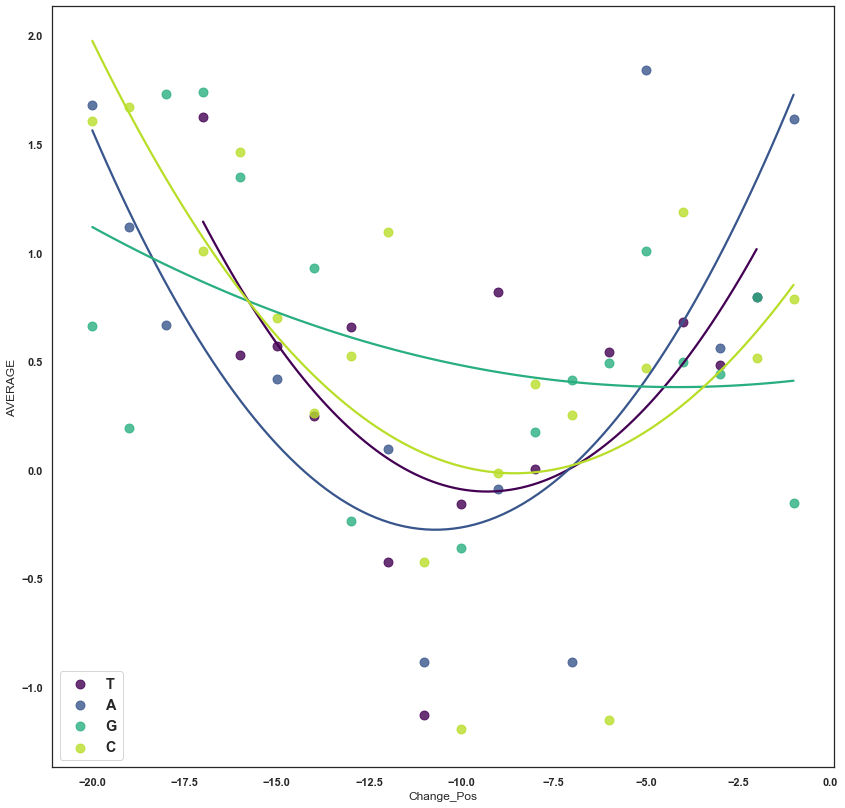

In [107]:
fig, ax = plt.subplots( figsize=(14,14))
ax1 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3[df3.AVERAGE != 2.592357456].loc[df3['Base'] == "T"], scatter_kws={"s": 80}, order=2, ci=None, label='T', color = '#440154FF')
ax2 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3[df3.AVERAGE != 2.592357456].loc[df3['Base'] == "A"], scatter_kws={"s": 80}, order=2, ci=None, label='A', color = '#39568CFF')
ax3 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3[df3.AVERAGE != 2.592357456].loc[df3['Base'] == "G"], scatter_kws={"s": 80}, order=2, ci=None, label='G', color = '#29AF7FFF')
ax4 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3[df3.AVERAGE != 2.592357456].loc[df3['Base'] == "C"], scatter_kws={"s": 80}, order=2, ci=None, label='C', color = '#B8DE29FF')
ax.legend(fontsize="large");

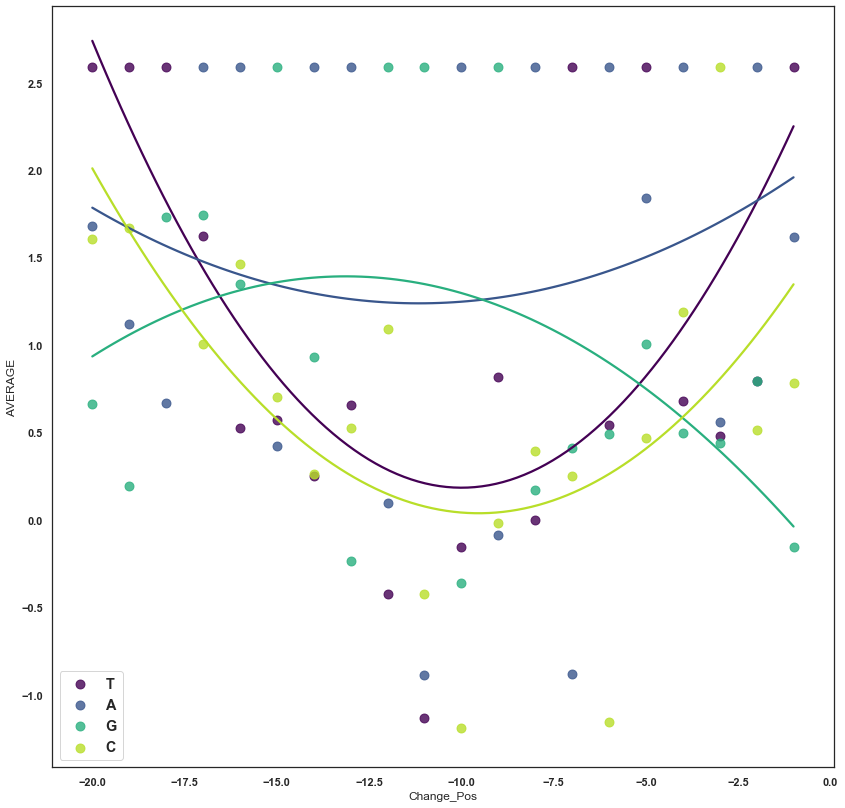

In [108]:
fig, ax = plt.subplots( figsize=(14,14))
ax1 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "T"], scatter_kws={"s": 80}, order=2, ci=None, label='T', color = '#440154FF')
ax2 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "A"], scatter_kws={"s": 80}, order=2, ci=None, label='A', color = '#39568CFF')
ax3 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "G"], scatter_kws={"s": 80}, order=2, ci=None, label='G', color = '#29AF7FFF')
ax4 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "C"], scatter_kws={"s": 80}, order=2, ci=None, label='C', color = '#B8DE29FF')
ax.legend(fontsize="large");

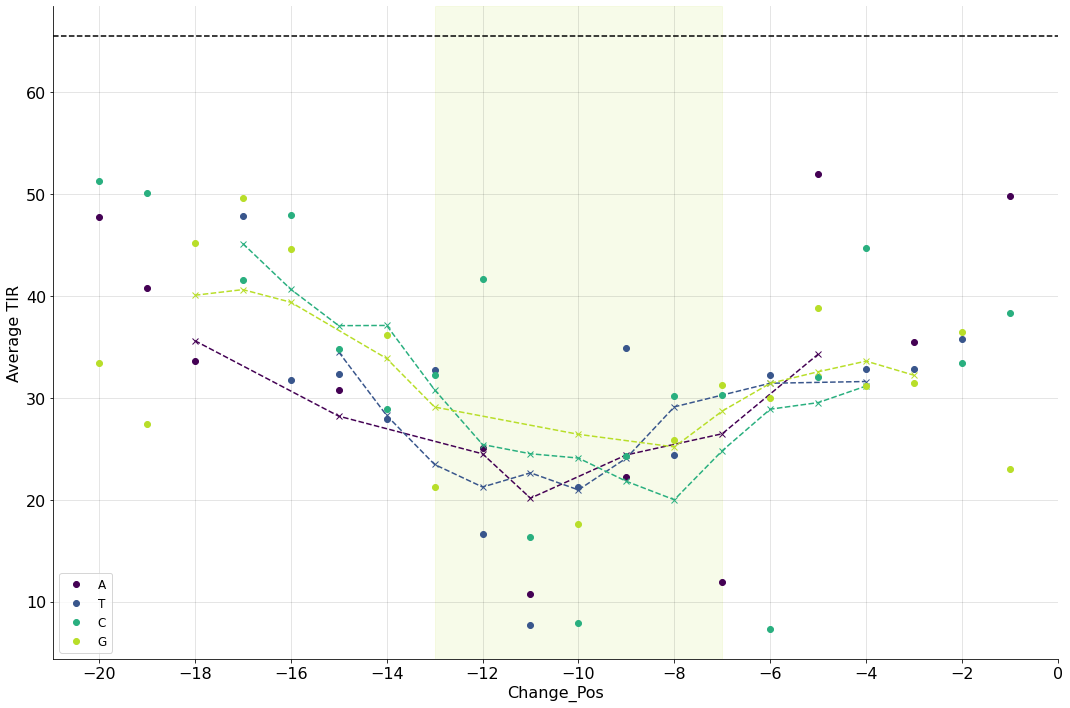

In [29]:
Path3 = '../../data/Pos_Change.csv'
df3 = pd.read_csv(Path3)

Path3 = '../../data/Pos_Change.csv'
df3 = pd.read_csv(Path3) [df3.AVERAGE != 65.553]
for base in 'ATCG':
    df3['Rolling' + base] = df3["AVERAGE"].loc[df3['Base'] == base].rolling(window=5,center=True).mean()
fig, ax = plt.subplots( figsize=(18,12))
for base,colour in zip('ATCG',('#440154FF','#39568CFF','#29AF7FFF','#B8DE29FF')):
    ax1 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['AVERAGE'].loc[df3['Base'] == base],ls=None,marker='o',linewidth=0,c=colour,label=base)
    ax2 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['Rolling' + base].loc[df3['Base'] == base],ls='--',marker='x',c=colour)
plt.axvspan(-7, -13, color='#B8DE29FF', alpha=0.1)
plt.axhline(65.553,color="black",ls="--")
ax.set_xlabel("Change_Pos");
ax.set_facecolor("white");
plt.grid(color='k', linestyle='-', linewidth=1,alpha=0.1);
plt.xticks(np.arange(-20, 1, step=2))
ax.set_ylabel("Average TIR");
ax.legend(fontsize="large");
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.savefig('line.pdf', bbox_inches='tight', dpi=300)

In [28]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")





print(df3.groupby('GROUP')['AVERAGE'].describe())
non_core = df3[(df3['GROUP'] == 'non_core')]
core = df3[(df3['GROUP'] == 'core')]
print("Normality:")
print(stats.shapiro(df3['AVERAGE']))
print("Welch Test:")
print(stats.ttest_ind(core['AVERAGE'], non_core['AVERAGE'], equal_var = False))
print("Student Test:")
print(stats.ttest_ind(core['AVERAGE'], non_core['AVERAGE'], equal_var = True))
print(welch_ttest(core['AVERAGE'], non_core['AVERAGE']))

          count       mean       std       min        25%        50%  \
GROUP                                                                  
core       18.0  22.947805  9.307015  7.645691  16.875712  23.300683   
non_core   41.0  35.984570  9.774619  7.304296  31.234256  33.663988   

                75%        max  
GROUP                           
core      29.090797  41.658673  
non_core  44.636302  51.999950  
Normality:
ShapiroResult(statistic=0.9638321399688721, pvalue=0.07683297246694565)
Welch Test:
Ttest_indResult(statistic=-4.878007565438334, pvalue=2.4618049774707804e-05)
Student Test:
Ttest_indResult(statistic=-4.784164640677357, pvalue=1.2544334273041224e-05)

 Welch's t-test= -4.8780 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 34.0567
None


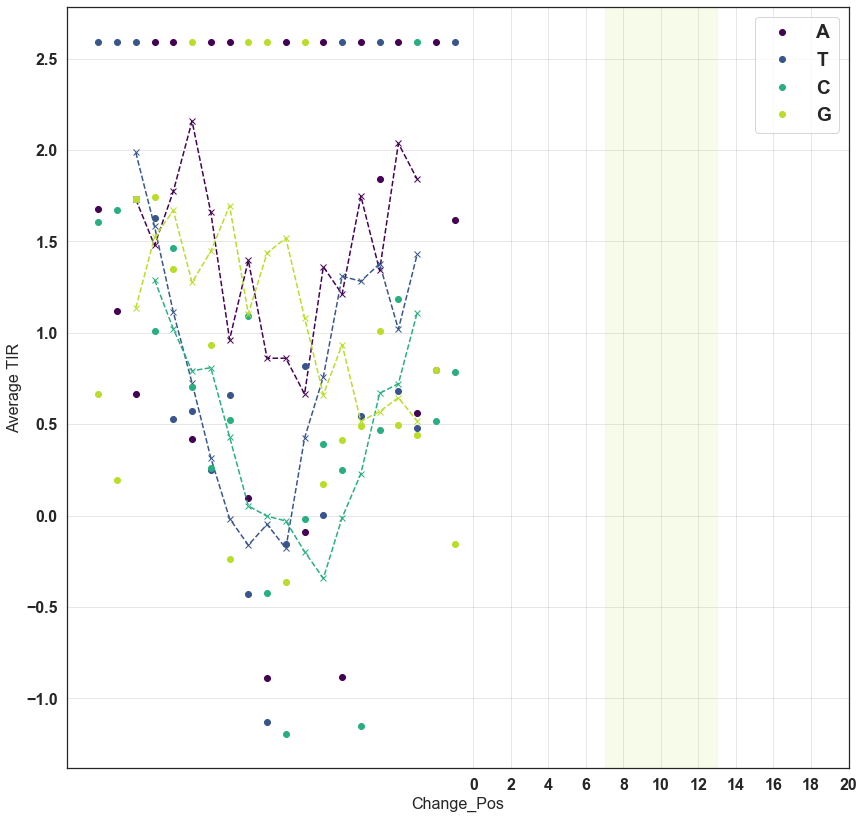

In [110]:
df3 = pd.read_csv(Path3)
for base in 'ATCG':
    df3['Rolling' + base] = df3["AVERAGE"].loc[df3['Base'] == base].rolling(window=5,center=True).mean()
fig, ax = plt.subplots( figsize=(14,14))
for base,colour in zip('ATCG',('#440154FF','#39568CFF','#29AF7FFF','#B8DE29FF')):
    ax1 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['AVERAGE'].loc[df3['Base'] == base],ls=None,marker='o',linewidth=0,c=colour,label=base)
    ax2 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['Rolling' + base].loc[df3['Base'] == base],ls='--',marker='x',c=colour)
plt.axvspan(7, 13, color='#B8DE29FF', alpha=0.1)
ax.set_xlabel("Change_Pos");
ax.set_facecolor("white");
plt.grid(color='k', linestyle='-', linewidth=1,alpha=0.1);
plt.xticks(np.arange(0, 21, step=2))
ax.set_ylabel("Average TIR");
ax.legend(fontsize="large");